In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randrange
plt.style.use("seaborn-bright")
np.random.seed(0)

In [249]:
def random_split(df, split_ratio=0.7):
    
    mask = np.random.random(len(df)) < split_ratio
    train = df[mask]
    test = df[~mask]
    x_train = np.array(train.drop("charges", axis=1))
    x_test = np.array(test.drop("charges", axis=1))
    y_train = np.array(train["charges"])
    y_test = np.array(test["charges"])
    y_train.resize(y_train.shape[0], 1)
    y_test.resize(y_test.shape[0], 1)
    return (x_train, y_train, x_test, y_test)

In [260]:
def gradient_descent(X, Y, lr=0.001, epochs=100, plot=None):
    
    N = X.shape[0]
    cumm_err, num_it = [], []
    W = np.random.random(X.shape[1])
    W.resize(X.shape[1], 1)
    for _ in range(epochs):
        diff = np.dot(X, W) - Y
        error = (np.sum(diff ** 2) / (2*N))
        dW = np.dot(X.T, diff)
        W -= lr * dW
        if plot is not None and not _ % plot:
            cumm_err.append(error)
            num_it.append(_)
    if plot is not None:
        plt.plot(num_it, cumm_err)
        plt.show()
    return W

In [261]:
def stocastic_gradient_descent(X, Y, lr=0.01, epochs=7500, plot=None):
    
    cumm_err, num_it = [], []
    W = np.random.random(X.shape[1])
    for _ in range(epochs):
        i = randrange(X.shape[0])
        diff = np.dot(X[i], W.T) - Y[i]
        error = 0.5 * (np.sum(diff ** 2))
        dW = X[i] * diff
        W -= lr * dW
        if plot is not None and not _ % plot:
            cumm_err.append(error)
            num_it.append(_)
    if plot is not None:
        plt.plot(num_it, cumm_err)
        plt.show()
    W.resize(W.shape[0], 1)
    return W

In [262]:
def norm_equations(X, Y):
    
    A = np.dot(X.T, X)
    B = np.dot(X.T, Y)
    W = np.dot(np.linalg.inv(A), B)
    return W

In [263]:
def evaluate(W, X, Y):

    return (np.sum((np.dot(X, W) - Y) ** 2) / (2*X.shape[0]))

In [264]:
df = pd.read_csv("insurance.csv")
df = (df - df.min()) / (df.max() - df.min())
df["bias"] = np.ones(len(df))

In [265]:
gd1, sgd1, neq1 = [], [], []
gd2, sgd2, neq2 = [], [], []

for _ in range(20):
    x_train, y_train, x_test, y_test = random_split(df)
    W = gradient_descent(x_train, y_train)
    train_error = evaluate(W, x_train, y_train)
    test_error = evaluate(W, x_test, y_test)
    gd1.append(train_error)
    gd2.append(test_error)
    
    W = stocastic_gradient_descent(x_train, y_train)
    train_error = evaluate(W, x_train, y_train)
    test_error = evaluate(W, x_test, y_test)
    sgd1.append(train_error)
    sgd2.append(test_error)
    
    W = norm_equations(x_train, y_train)
    train_error = evaluate(W, x_train, y_train)
    test_error = evaluate(W, x_test, y_test)
    neq1.append(train_error)
    neq2.append(test_error)

In [266]:
gd1 = np.array(gd1)
gd2 = np.array(gd2)
sgd1 = np.array(sgd1)
sgd2 = np.array(sgd2)
neq1 = np.array(neq1)
neq2 = np.array(neq2)

In [267]:
print("train metrics")
print(gd1.mean(), gd1.var())
print(sgd1.mean(), sgd1.var())
print(neq1.mean(), neq1.var())

train metrics
15.341839131539029 0.23780952726163554
15.54132879525088 0.25086521833306963
15.329040959490635 0.23506156935583103


In [268]:
print("test metrics")
print(gd2.mean(), gd2.var())
print(sgd2.mean(), sgd2.var())
print(neq2.mean(), neq2.var())

test metrics
6.6728277256566155 0.24260618416330876
6.757258714903351 0.24527928968252208
6.674037466577458 0.2412506457192925


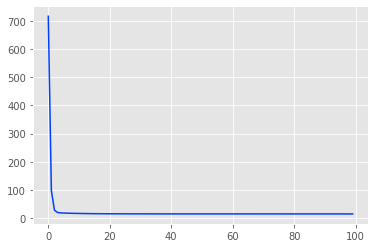

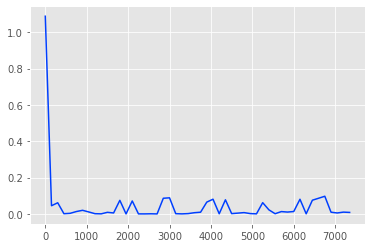

In [277]:
x_train, y_train, x_test, y_test = random_split(df)
W = gradient_descent(x_train, y_train, plot=1)
W = stocastic_gradient_descent(x_train, y_train, plot=150)